In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/salary_data.csv')

In [3]:
df.head()

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [5]:
X = std_scaler.fit_transform(df['experience'].values.reshape(-1, 1))
y = mm_scaler.fit_transform(df['salary'].values.reshape(-1, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

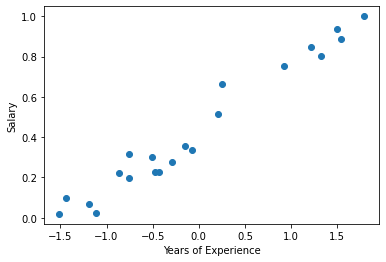

In [7]:
plt.scatter(X_train, y_train)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
line = X_train.mean() * X_train + 0.2

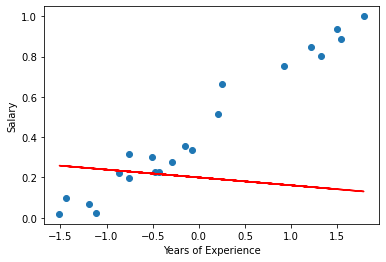

In [9]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [10]:
class LinearRegression:
	def __init__(self):
		# attributes
		self.weights = None
		self.bias = None
		
		self.total_cost = None
	
		self.losses = []
		
	def __slope(self, x, w, b):
		'''
		performs slope calculation y = m * x + b
		x = Input Features
		w = Weights
		b = Bias
		'''
		return np.matmul(x, w) + b
	
	def __cost(self, x, y, w, b):
		'''
		computes Mean Sqared Error for given X & y per iteration
		'''
		self.total_cost = 0
		num_samples = len(x)
		
		for i in range(0, num_samples):
			pred = self.__slope(x[i], w, b)[0]
			self.total_cost += (y[i] - pred) ** 2 # MSE
	
		self.total_cost /= float(num_samples)
		
		return self.total_cost
	
	def __optimizer(self, x, y, w, b, learning_rate):
		'''
		performs Gradient Descent to optimize Weights & Bias paramters per iteration
		'''
		dw, db = 0, 0
		num_samples = len(x)
		
		for i in range(0, num_samples):
			dw += - (2 * (y[i] - self.__slope(x[i], w, b)[0]) * x[i]) / num_samples
			db += - (2 * (y[i] - self.__slope(x[i], w, b)[0])) / num_samples
		
		w -= learning_rate * dw.reshape(x.shape[1], 1)
		b -= learning_rate * db
					 
		return w, b
	
	def fit(self, X, y, epochs=30, batch_size=32, learning_rate=0.1, verbose=1):
		'''
		Training function
		'''
		# Initialize/Sample weights and biases from a random normal distribution
		# Xavier Initialization
		# Square Root(6 / (1.0 + input features + output features))
		lim = np.sqrt(6 / (1.0 + X.shape[0] + X.shape[1]))
					 
		w = np.random.uniform(low =-lim, high= lim, size=(X.shape[1], 1))
		b = np.random.uniform(low= -lim , high= lim, size=1)[0]
		
		num_examples = len(X)
		
		loss = None
		
		# Train the model for given epochs
		for e in range(epochs):
			# Train in batches
			for offset in range(0, num_examples, batch_size):
				# create batches 
				end = offset + batch_size
				batch_x, batch_y = X[offset:end], y[offset:end]
				
				# calculate loss	 
				loss = self.__cost(batch_x, batch_y, w, b)     
				
				# perform Gradient Descent to optimize Weights & Biases	
				w, b = self.__optimizer(batch_x, batch_y, w, b, learning_rate=learning_rate)
			
			# store losses as an array
			self.losses.append(loss)
			
			# Display training loss based on verbose value
			if((e % verbose) == 0 or e==0 or e==(epochs-1)):
				print(f"Epoch {e+1}, Loss: {loss[0]:.4f}")
		
		# Update class's weights & biases with optimized weights & biases
		self.weights = w
		self.bias = b
					 
	def predict(self, x):
		'''
		returns predicted values when input with new data points
		'''
		if self.weights.any() and self.bias.any():
			return np.matmul(x, self.weights) + self.bias
		
		else:
			lim = np.sqrt(6 / (0.5 + X.shape[0] + X.shape[1]))
			
			w = np.random.uniform(low =-lim, high= lim, size=(X.shape[1], 1))
			b = np.random.uniform(low= -lim , high= lim, size=1)[0]
			
			return np.matmul(x, w) + b

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train, epochs=100, batch_size=8, learning_rate=0.1, verbose=10)

Epoch 1, Loss: 0.2630
Epoch 11, Loss: 0.0014
Epoch 21, Loss: 0.0014
Epoch 31, Loss: 0.0014
Epoch 41, Loss: 0.0014
Epoch 51, Loss: 0.0014
Epoch 61, Loss: 0.0014
Epoch 71, Loss: 0.0014
Epoch 81, Loss: 0.0014
Epoch 91, Loss: 0.0014
Epoch 100, Loss: 0.0014


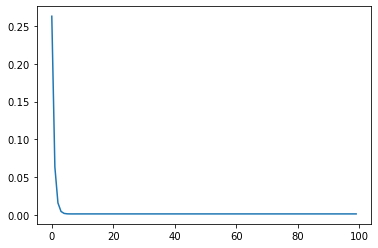

In [13]:
plt.plot(model.losses)
plt.show()

In [14]:
line = model.predict(X_train)

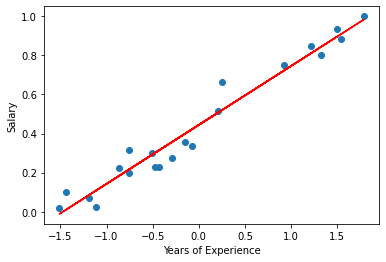

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression as Lm

In [17]:
lm = Lm()

In [18]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
line = lm.predict(X_train)

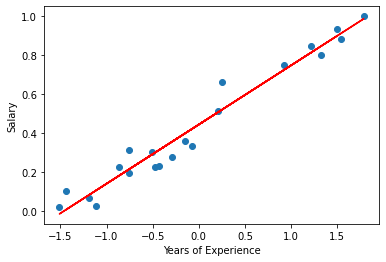

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [21]:
df = pd.read_csv('data/Ecommerce Customers')

In [22]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [23]:
X = std_scaler.fit_transform(df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].values)
y = mm_scaler.fit_transform(df['Yearly Amount Spent'].values.reshape(-1, 1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train, epochs=100, batch_size=8, learning_rate=0.1, verbose=10)

Epoch 1, Loss: 0.0002
Epoch 11, Loss: 0.0002
Epoch 21, Loss: 0.0002
Epoch 31, Loss: 0.0002
Epoch 41, Loss: 0.0002
Epoch 51, Loss: 0.0002
Epoch 61, Loss: 0.0002
Epoch 71, Loss: 0.0002
Epoch 81, Loss: 0.0002
Epoch 91, Loss: 0.0002
Epoch 100, Loss: 0.0002


In [27]:
sk_model = Lm()

In [28]:
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
from sklearn.metrics import mean_squared_error as mse

In [30]:
y_pred = model.predict(X_test)

In [31]:
print(f'{mse(y_pred, y_test):.4f}')

0.0004


In [32]:
sk_pred = sk_model.predict(X_test)

In [33]:
print(f'{mse(sk_pred, y_test):.4f}')

0.0004
